In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


from sklearn.datasets import load_diabetes
data=load_diabetes()

X=data.data
y=data.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45
                                               )
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(X_train,y_train)
y_pred=L.predict(X_test)
scores = cross_val_score(L, X, y, cv=5)


from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Average performance score:", scores.mean())


R2 score 0.5188113124539249
RMSE 48.72713760953253
Average performance score: 0.48231643590864215


In [2]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.1)
R.fit(X_train,y_train)
y_pred1=R.predict(X_test)
scores = cross_val_score(R, X, y, cv=5)

print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("Average performance score:", scores.mean())


R2 score 0.5208421054129915
RMSE 48.62420568515607
Average performance score: 0.47988210231953665


In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
alpha_values = [0.01, 0.1, 1, 10, 100, 1000, 10000]

# Create Ridge model
ridge = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alpha_values}, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Use the best alpha to fit the model
ridge_optimized = Ridge(alpha=best_alpha)
ridge_optimized.fit(X_train, y_train)
y_pred = ridge_optimized.predict(X_test)

# Evaluate performance
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Best alpha: 0.1
R² score: 0.5208421054129915
RMSE: 48.62420568515607


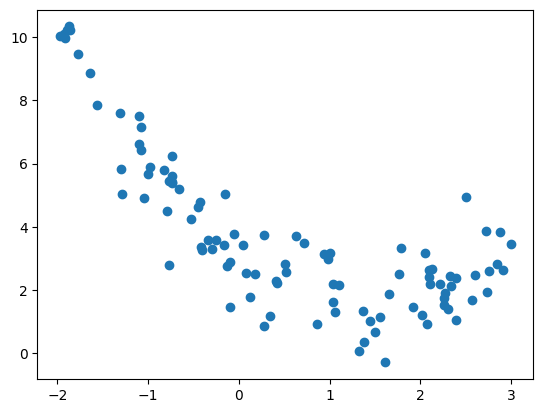

In [5]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

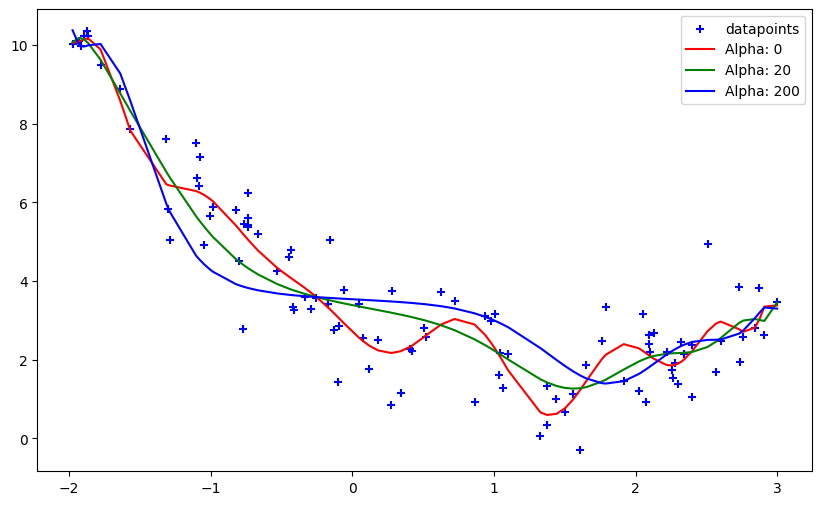

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
  model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
  ])
  model.fit(x1, x2)
  return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']


plt.figure(figsize=(10,6))
plt.scatter(x1,x2,color='b', marker='+',label='datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)

    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()


